In [48]:
# Import libraries
import numpy as np
import pandas as pd

from ISLP import load_data

import matplotlib.pyplot as plt
from matplotlib import image

import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [45]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten,Embedding, LSTM, SimpleRNN
from keras.datasets import mnist, cifar10
from keras.utils import to_categorical
from keras.applications.resnet import preprocess_input
from keras.applications import ResNet50
from keras.applications import imagenet_utils

In [3]:
import h5py
import numpy as np
f = h5py.File('bird_spectrograms.hdf5', 'r')


In [4]:
list(f.keys())

['amecro',
 'amerob',
 'bewwre',
 'bkcchi',
 'daejun',
 'houfin',
 'houspa',
 'norfli',
 'rewbla',
 'sonspa',
 'spotow',
 'whcspa']

<BarContainer object of 12 artists>

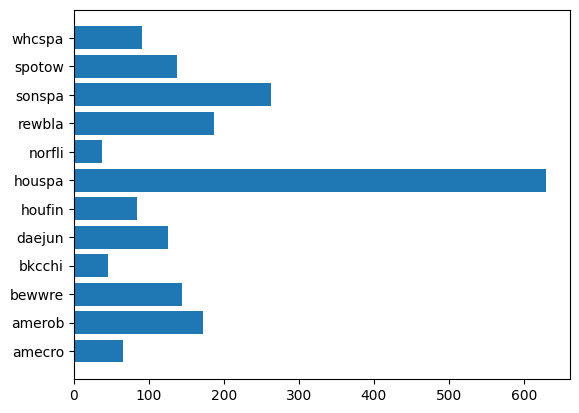

In [5]:
bird=[]
samples=[]
for x in list(f.keys()):
    bird.append(x)
    samples.append(f[str(x)].shape[2])

plt.barh(bird,samples)

In [6]:
shapes=[]
for x in list(f.keys()):
    print(f[str(x)].shape)
    shapes.append(str(x))
    shapes.append(f[str(x)].shape[2])
print(shapes)

(128, 517, 66)
(128, 517, 172)
(128, 517, 144)
(128, 517, 45)
(128, 517, 125)
(128, 517, 84)
(128, 517, 630)
(128, 517, 37)
(128, 517, 187)
(128, 517, 263)
(128, 517, 137)
(128, 517, 91)
['amecro', 66, 'amerob', 172, 'bewwre', 144, 'bkcchi', 45, 'daejun', 125, 'houfin', 84, 'houspa', 630, 'norfli', 37, 'rewbla', 187, 'sonspa', 263, 'spotow', 137, 'whcspa', 91]


Let's use rewbla and amerob, since they have rather similar classes.

In [7]:
def rewbla_class_maker():
    names=[]
    features_frame=[]
    dset = f['rewbla']
    for i in range(dset.shape[2]):
        features_frame.append(dset[:,:,i])
        names.append("rewbla")

    return (features_frame, names)


In [8]:
x1=rewbla_class_maker()

In [9]:
def amerob_class_maker():
    names=[]
    features_frame=[]
    dset = f['amerob']
    for i in range(dset.shape[2]):
        features_frame.append(dset[:,:,i])
        names.append("amerob")

    return (features_frame, names)

In [10]:
x2=amerob_class_maker()

In [11]:
train_features=np.concatenate([x2[0],x1[0]], axis=0)

In [12]:
train_names=np.concatenate([x2[1],x1[1]], axis=0)

In [13]:
train_names = (train_names == 'rewbla').astype(int)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(train_features
                                                    , train_names
                                                    , test_size=0.10, random_state=13)


In [53]:
X_train = X_train.reshape(X_train.shape[0] ,-1)
X_test = X_test.reshape(X_test.shape[0] ,-1)

In [54]:
# define a neural network model 

modnn = Sequential(
    [
    Dense(units=50, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(rate=0.4),
    Dense(units=1)
    ])
modnn

<Sequential name=sequential_7, built=True>

In [55]:
# compiling the neural network model 
modnn.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [56]:
X_train.shape

(323, 66176)

We use a larger batch size with this model.

In [57]:
history = modnn.fit(X_train, y_train,
                    epochs=60,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 539ms/step - accuracy: 0.5064 - loss: 7.9291 - val_accuracy: 0.4722 - val_loss: 8.5068
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.4936 - loss: 8.1626 - val_accuracy: 0.4722 - val_loss: 8.5068
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.4350 - loss: 9.1071 - val_accuracy: 0.4722 - val_loss: 8.5068
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.4769 - loss: 8.4309 - val_accuracy: 0.4722 - val_loss: 8.5068
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5059 - loss: 7.9639 - val_accuracy: 0.4722 - val_loss: 8.5068
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.4681 - loss: 8.5726 - val_accuracy: 0.4722 - val_loss: 8.5068
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.4838 - loss: 8.3204 - val_accuracy: 0.4722 - val_loss: 8.5068
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.4958 - loss: 8.1268 - val_accuracy: 0.4722 - 

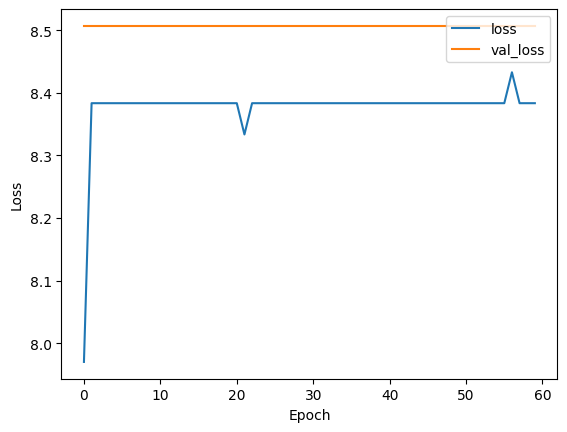

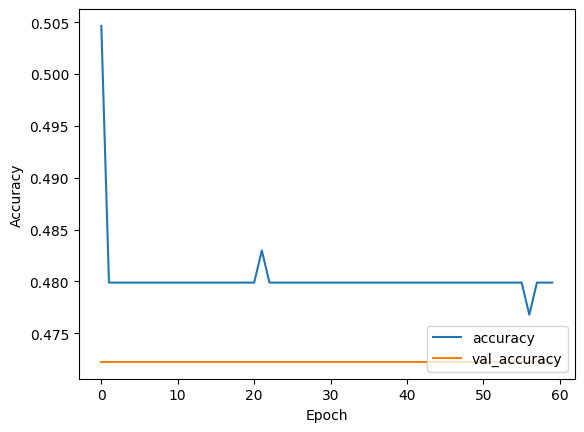

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [59]:
score = modnn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 47.22%


In [64]:
y_test.shape

(36,)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step 


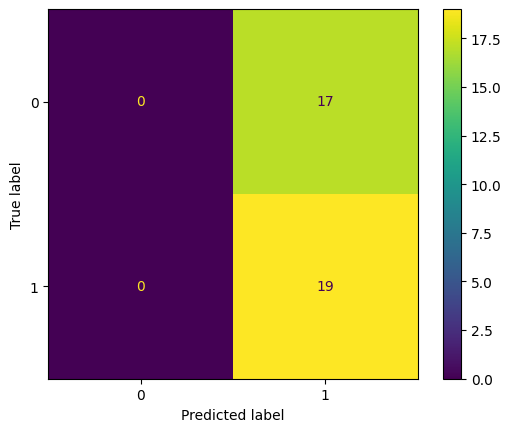

In [70]:
predict=modnn.predict(X_test)

for x in range(predict.shape[0]):
    if predict[x]>0.5:
        predict[x]=1
    else:
        predict[x]=0
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Let's try some different hyper parameters. Namely, let's try increasing the number of epochs to see if our model will converge.

In [71]:

modnn = Sequential(
    [
    Dense(units=50, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(rate=0.1),
    Dense(units=1)
    ])
modnn

# compiling the neural network model 
modnn.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history = modnn.fit(X_train, y_train,
                    epochs=60,
                    batch_size=16,
                    validation_data=(X_test, y_test))

c:\Users\Jesse\anaconda3\envs\myenvname\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.5217 - loss: 7.6265 - val_accuracy: 0.5278 - val_loss: 7.5283
Epoch 2/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.5137 - loss: 7.7543 - val_accuracy: 0.5278 - val_loss: 7.5283
Epoch 3/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.5188 - loss: 7.6717 - val_accuracy: 0.5278 - val_loss: 7.5283
Epoch 4/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5126 - loss: 7.7697 - val_accuracy: 0.5278 - val_loss: 7.5283
Epoch 5/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.4876 - loss: 8.1685 - val_accuracy: 0.5278 - val_loss: 7.5283
Epoch 6/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.4992 - loss: 7.9843 - val_accuracy: 0.5278 - val_loss: 7.5283
Epoch 7/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.5318 - loss: 7.4637 - val_accuracy: 0.5278 - val_loss: 7.5283
Epoch 8/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.5351 - loss: 7.4120 - val_accuracy: 0.5278 - 

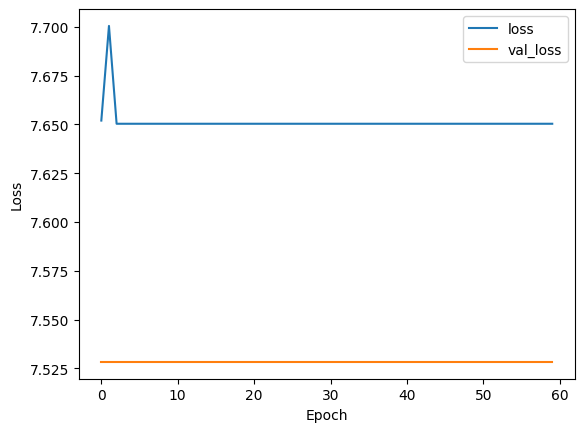

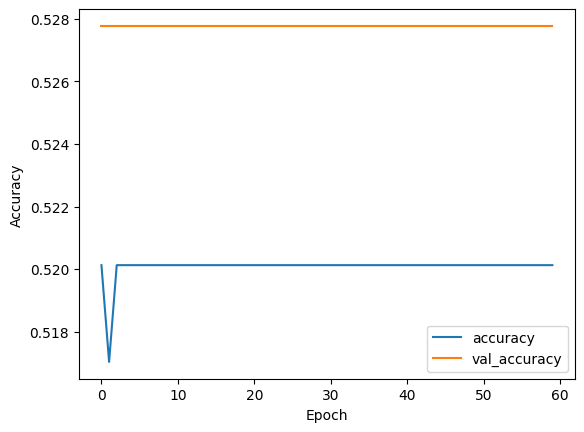

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [73]:
score = modnn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 52.78%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


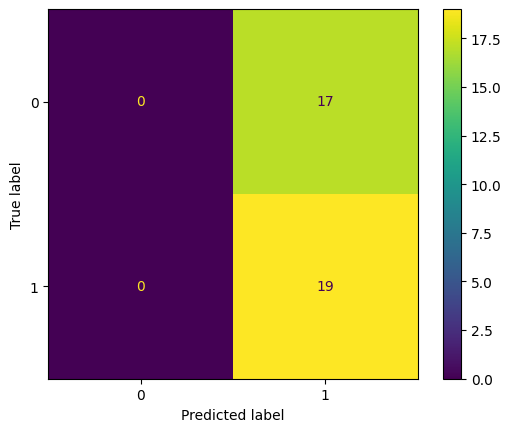

In [74]:
predict=modnn.predict(X_test)

for x in range(predict.shape[0]):
    if predict[x]>0.5:
        predict[x]=1
    else:
        predict[x]=0
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [75]:

modnn = Sequential(
    [
    Dense(units=50, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=1)
    ])
modnn

# compiling the neural network model 
modnn.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


history = modnn.fit(X_train, y_train,
                    epochs=60,
                    batch_size=8,
                    validation_data=(X_test, y_test))

c:\Users\Jesse\anaconda3\envs\myenvname\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.5023 - loss: 7.9349 - val_accuracy: 0.5278 - val_loss: 7.5283
Epoch 2/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4766 - loss: 8.3446 - val_accuracy: 0.5278 - val_loss: 7.5283
Epoch 3/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4697 - loss: 8.4541 - val_accuracy: 0.5278 - val_loss: 7.5283
Epoch 4/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.4940 - loss: 8.0673 - val_accuracy: 0.5278 - val_loss: 7.5283
Epoch 5/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5462 - loss: 7.2347 - val_accuracy: 0.5278 - val_loss: 7.5283
Epoch 6/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5226 - loss: 7.6108 - val_accuracy: 0.5278 - val_loss: 7.5283
Epoch 7/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5021 - loss: 7.9383 - val_accuracy: 0.5278 - val_loss: 7.5283
Epoch 8/60
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5136 - loss: 7.7537 - val_accuracy: 0.5278 - v

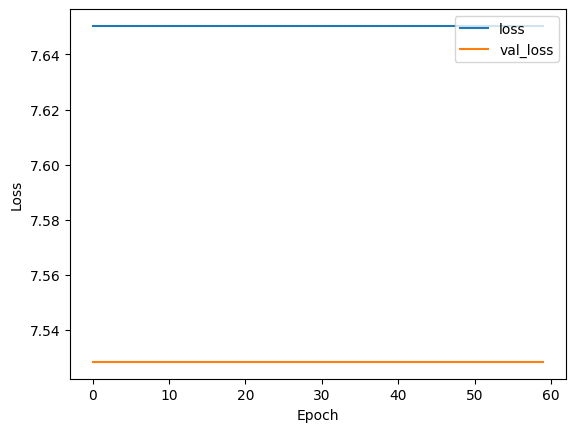

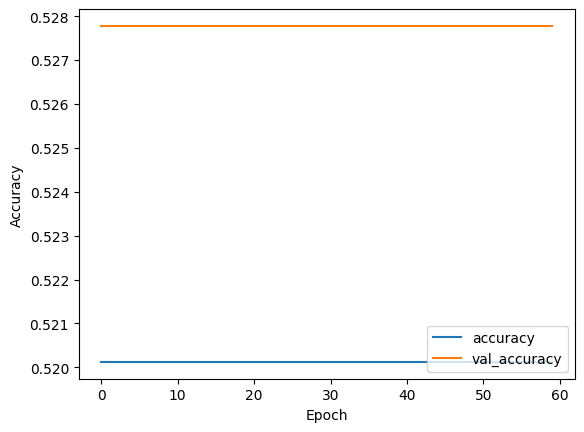

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [77]:
score = modnn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 52.78%


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001CB2CA4C820> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


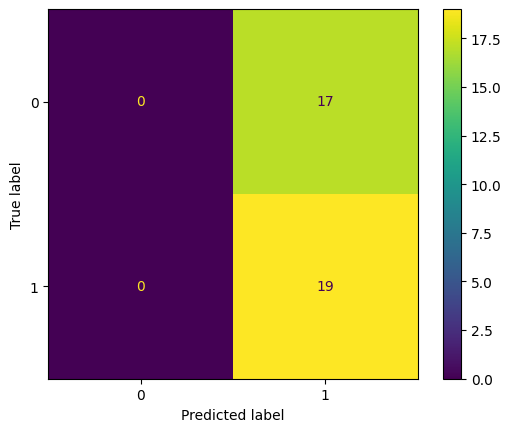

In [78]:
predict=modnn.predict(X_test)

for x in range(predict.shape[0]):
    if predict[x]>0.5:
        predict[x]=1
    else:
        predict[x]=0
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Let's try using a  CNN now. To do this, we need to reshape our vectors to avoid flattening them. Reloading them as before should be fine for our purposes.

In [90]:
X_train, X_test, y_train, y_test = train_test_split(train_features
                                                    , train_names
                                                    , test_size=0.33, random_state=13)

We must reshape our matrix to add an important dimension. For Usual RGB images, the last dimension is reserved for color, but we are in black and white, so we just need a 1.

In [92]:
X_train = X_train.reshape((240, 128, 517, 1))


In [91]:
X_test=X_test.reshape((119,128,517,1))

Stack Abuse. (2023, July 19). Don’t Use Flatten: Global Pooling for CNNs with TensorFlow and Keras.https://stackabuse.com/dont-use-flatten-global-pooling-for-cnns-with-tensorflow-and-keras/

In [105]:
from tensorflow.keras.layers import  GlobalAveragePooling2D

model_cnn = Sequential(
    [
    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(128,517,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    GlobalAveragePooling2D(),

    Dropout(rate=0.2),
    #Because of our small amount of data, we lower the dropout rate to 0.2
    Dense(units=64, activation='relu'),
    Dense(units=1, activation='softmax')
    ])

model_cnn.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 517, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 64, 258, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 258, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 129, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,041 (90.00 KB)

 Trainable params: 23,041 (90.00 KB)

 Non-trainable params: 0 (0.00 B)

https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
skadaver (https://stats.stackexchange.com/users/254303/skadaver), Cross Entropy vs. Sparse Cross Entropy: When to use one over the other, URL (version: 2020-02-03): https://stats.stackexchange.com/q/420730


In [109]:


model_cnn.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])



In [110]:
history = model_cnn.fit(X_train, y_train,
                        epochs=10,
                        batch_size=16,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 871ms/step - accuracy: 0.5126 - loss: 1.1823 - val_accuracy: 0.6042 - val_loss: 0.6655
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 769ms/step - accuracy: 0.5300 - loss: 0.8500 - val_accuracy: 0.6042 - val_loss: 0.7057
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 753ms/step - accuracy: 0.5013 - loss: 0.7276 - val_accuracy: 0.6042 - val_loss: 0.7005
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 859ms/step - accuracy: 0.5295 - loss: 0.7228 - val_accuracy: 0.6042 - val_loss: 0.6731
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 864ms/step - accuracy: 0.5050 - loss: 0.7236 - val_accuracy: 0.6042 - val_loss: 0.6659
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 707ms/step - accuracy: 0.5274 - loss: 0.6854 - val_accuracy: 0.6042 - val_loss: 0.6931
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 763ms/step - accuracy: 0.4877 - loss: 0.7255 - val_accuracy: 0.6042 - val_loss: 0.6686
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 753ms/step - accuracy: 0.5214 - loss: 0.6877 - val_accuracy:

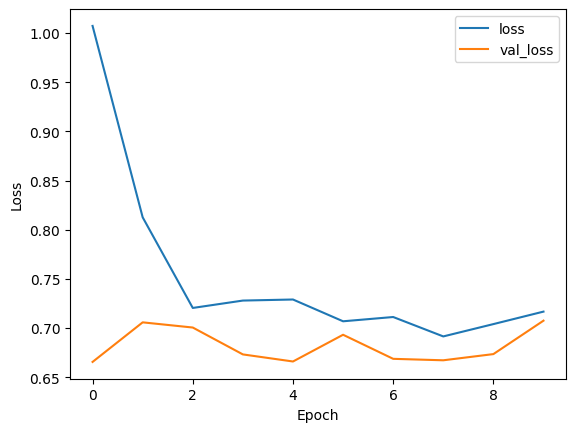

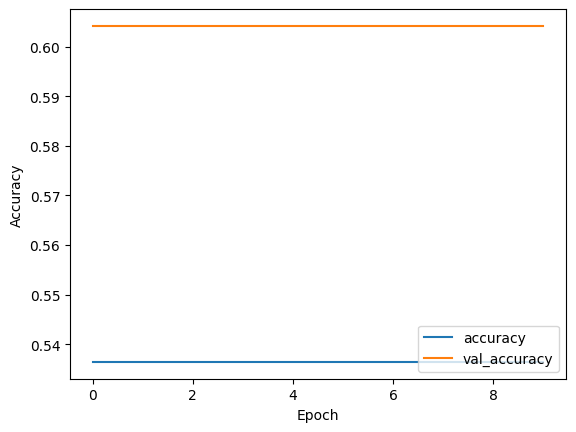

In [111]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [112]:
score = model_cnn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 46.22%


In [113]:
predict.shape

(119, 2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 310ms/step


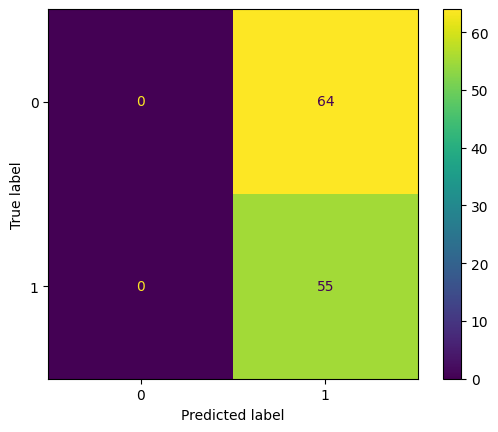

In [115]:
predict=model_cnn.predict(X_test)

for x in range(predict.shape[0]):
    if predict[x]>0.5:
        predict[x]=1
    else:
        predict[x]=0
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Our model hasn't converged yet, let's try to increase epochs. Though, there is a risk we will run out of memory.

In [124]:

model_cnn = Sequential(
    [
    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(128,517,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    GlobalAveragePooling2D(),
    Dropout(rate=0.2),

    Dense(units=64, activation='relu'),
    Dense(units=1, activation='sigmoid')
    ])


c:\Users\Jesse\anaconda3\envs\myenvname\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [125]:

model_cnn.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

In [126]:
history = model_cnn.fit(X_train, y_train,
                        epochs=40,
                        batch_size=16,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5107 - loss: 4.2656 - val_accuracy: 0.6042 - val_loss: 0.6543
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 819ms/step - accuracy: 0.5296 - loss: 1.0749 - val_accuracy: 0.3958 - val_loss: 0.7209
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 895ms/step - accuracy: 0.5146 - loss: 0.8359 - val_accuracy: 0.3958 - val_loss: 0.8916
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5576 - loss: 0.7837 - val_accuracy: 0.6042 - val_loss: 0.6628
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 673ms/step - accuracy: 0.4798 - loss: 0.7931 - val_accuracy: 0.3958 - val_loss: 0.8548
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 670ms/step - accuracy: 0.5107 - loss: 0.7720 - val_accuracy: 0.3958 - val_loss: 0.7426
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 677ms/step - accuracy: 0.5227 - loss: 0.7804 - val_accuracy: 0.3958 - val_loss: 0.7086
Epoch 8/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 716ms/step - accuracy: 0.4882 - loss: 0.7330 - val_accuracy: 0.60

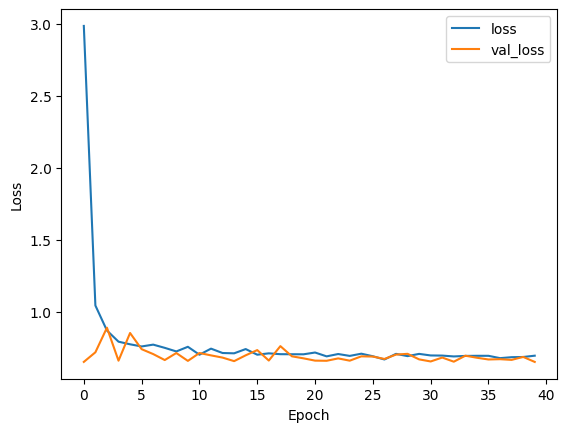

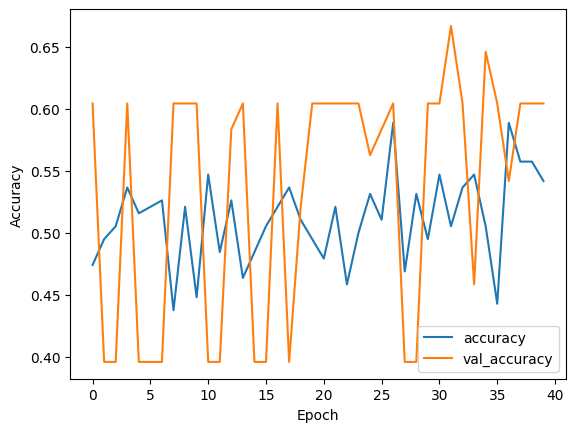

In [127]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [128]:
score = model_cnn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 46.22%


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 464ms/step


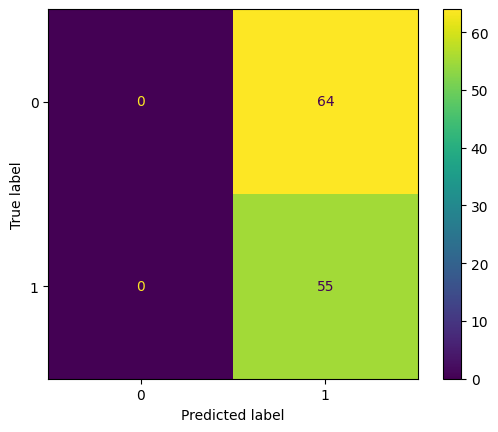

In [129]:
predict=model_cnn.predict(X_test)

for x in range(predict.shape[0]):
    if predict[x]>0.5:
        predict[x]=1
    else:
        predict[x]=0
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

We will now move onto trying to use a recurrent neural network.

In [130]:
X_train_seq = X_train.transpose(0, 2, 1,3)

In [131]:
X_test_seq = X_test.transpose(0,2,1,3)

https://keras.io/api/optimizers/rmsprop/

In [132]:
model = Sequential([
    SimpleRNN(units=64, input_shape=(517, 128)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\Jesse\anaconda3\envs\myenvname\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [133]:
history = model.fit(X_train_seq, y_train,
                        epochs=40,
                        batch_size=16,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 261ms/step - accuracy: 0.5418 - loss: 0.7684 - val_accuracy: 0.6042 - val_loss: 0.6625
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.5433 - loss: 0.7014 - val_accuracy: 0.5833 - val_loss: 0.6949
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.5229 - loss: 0.6998 - val_accuracy: 0.3542 - val_loss: 0.7508
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5058 - loss: 0.6963 - val_accuracy: 0.5625 - val_loss: 0.6835
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.5579 - loss: 0.6881 - val_accuracy: 0.5833 - val_loss: 0.6557
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.5326 - loss: 0.6975 - val_accuracy: 0.6042 - val_loss: 0.6688
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 0.5401 - loss: 0.6938 - val_accuracy: 0.5417 - val_loss: 0.6941
Epoch 8/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.5403 - loss: 0.7014 - val_accuracy: 0.5

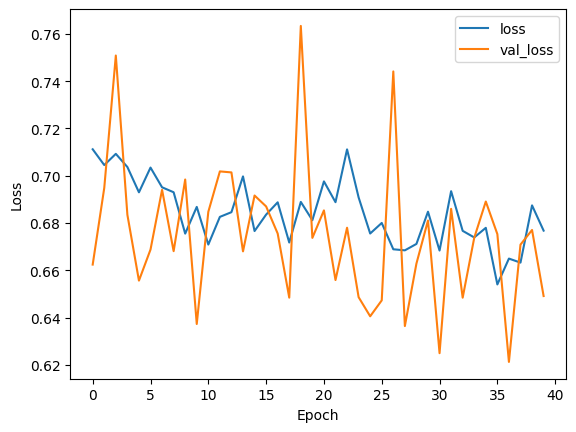

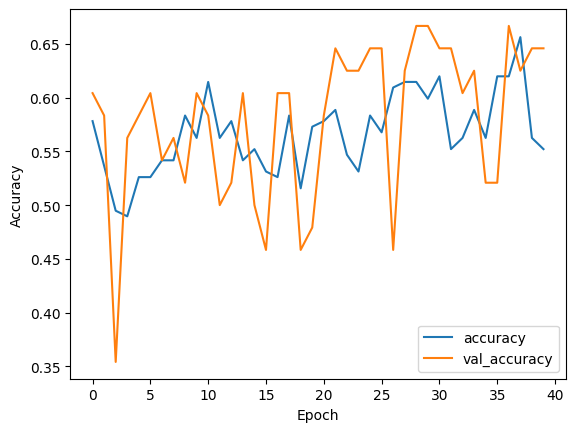

In [136]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [137]:
score = model.evaluate(X_test_seq, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 47.90%


In [145]:
predict[1]

array([1., 1.], dtype=float32)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step 


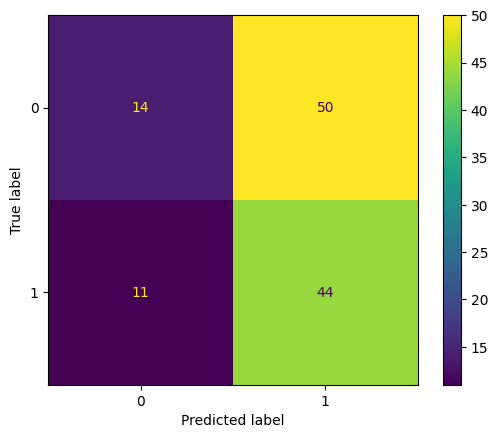

In [149]:
predict=model.predict(X_test_seq)
predict1=[]
for x in range(predict.shape[0]):
    if predict[x][0]>0.5:
        predict1.append(1)
    else:
        predict1.append(0)
cm = confusion_matrix(y_test, predict1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Let's try fine tuning the learning rate by decreasing it. We use RMSprop to set a custom learning rate.

In [154]:
from tensorflow.keras.optimizers import RMSprop

model = Sequential([
    SimpleRNN(units=64, input_shape=(517, 128)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\Jesse\anaconda3\envs\myenvname\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [155]:
history = model.fit(X_train_seq, y_train,
                        epochs=40,
                        batch_size=16,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - accuracy: 0.4870 - loss: 0.7172 - val_accuracy: 0.5417 - val_loss: 0.7017
Epoch 2/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.5385 - loss: 0.6911 - val_accuracy: 0.5208 - val_loss: 0.7076
Epoch 3/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.5394 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.7030
Epoch 4/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - accuracy: 0.5583 - loss: 0.6828 - val_accuracy: 0.5208 - val_loss: 0.7172
Epoch 5/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.5846 - loss: 0.6746 - val_accuracy: 0.5000 - val_loss: 0.7030
Epoch 6/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.5445 - loss: 0.6742 - val_accuracy: 0.4583 - val_loss: 0.7201
Epoch 7/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.6509 - loss: 0.6665 - val_accuracy: 0.5417 - val_loss: 0.6995
Epoch 8/40
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - accuracy: 0.5957 - loss: 0.6687 - val_accuracy: 0.5

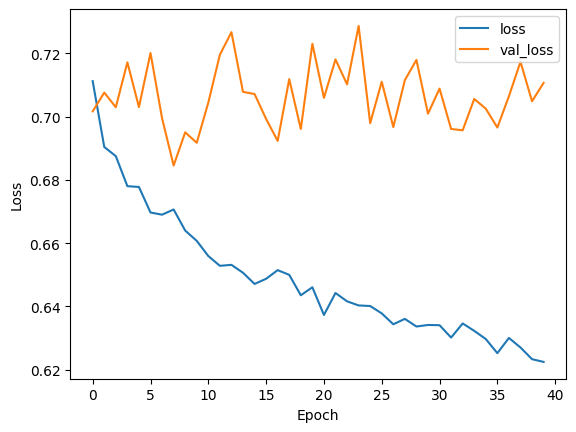

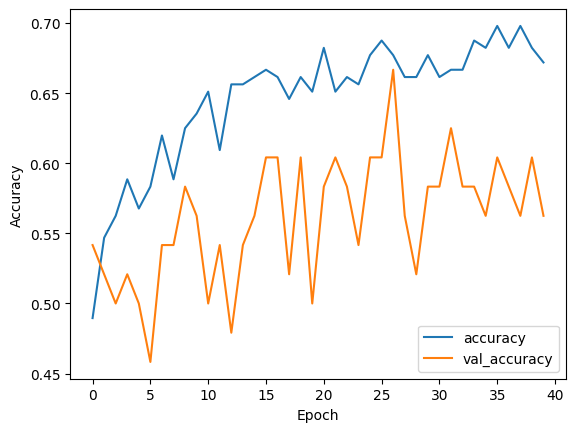

In [156]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [157]:
score = model.evaluate(X_test_seq, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 51.26%


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 233ms/step


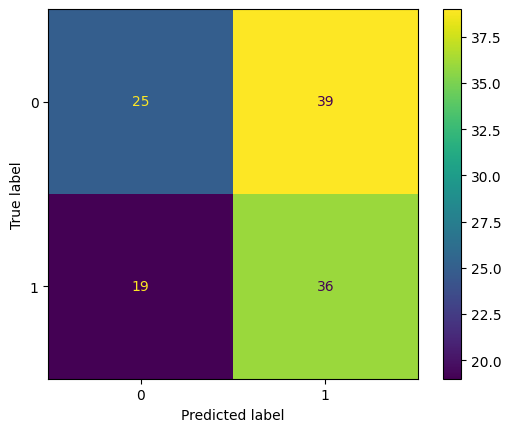

In [158]:
predict=model.predict(X_test_seq)
predict1=[]
for x in range(predict.shape[0]):
    if predict[x][0]>0.5:
        predict1.append(1)
    else:
        predict1.append(0)
cm = confusion_matrix(y_test, predict1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

It looks like decreasing the learning rate has improved our results.

Now we need to do multiclass classification.

In [159]:
shapes=[]
for x in list(f.keys()):
    print(f[str(x)].shape)
    shapes.append(str(x))
    shapes.append(f[str(x)].shape[2])
print(shapes)

(128, 517, 66)
(128, 517, 172)
(128, 517, 144)
(128, 517, 45)
(128, 517, 125)
(128, 517, 84)
(128, 517, 630)
(128, 517, 37)
(128, 517, 187)
(128, 517, 263)
(128, 517, 137)
(128, 517, 91)
['amecro', 66, 'amerob', 172, 'bewwre', 144, 'bkcchi', 45, 'daejun', 125, 'houfin', 84, 'houspa', 630, 'norfli', 37, 'rewbla', 187, 'sonspa', 263, 'spotow', 137, 'whcspa', 91]


In [290]:
x_full=[]
names_full=[]

In [ ]:
for x in list(f.keys()):
    dset=f[str(x)]
    for i in range(37):
        x_full.append(dset[:,:,i])
        names_full.append(str(x))


In [287]:
f["amerob"].shape[2]

172

In [291]:
for x in list(f.keys()):
    dset=f[str(x)]
    if dset.shape[2]<300:
        for i in range(dset.shape[2]):
            x_full.append(dset[:,:,i])
            names_full.append(str(x))
    else:
        for i in range(300):
            x_full.append(dset[:,:,i])
            names_full.append(str(x))


In [292]:
len(list(f.keys()))

12

Let's do one hot encoding. We draw our examples from https://www.datacamp.com/tutorial/one-hot-encoding-python-tutorial.

In [293]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelBinarizer, LabelEncoder

names_list = [[name] for name in names_full]
enc = OneHotEncoder(handle_unknown='ignore')



enc.fit(names_list)

names_full=np.array(names_full)

names_full=names_full.reshape(-1, 1)

names_enc = enc.transform(names_full).toarray()


names_enc

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [294]:
X_train, X_test, y_train, y_test = train_test_split(x_full
                                                    , names_enc
                                                    , test_size=0.33, random_state=13)

As before, let's flatten our matrices.

In [295]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [296]:
X_train = X_train.reshape(X_train.shape[0] ,-1)
X_test = X_test.reshape(X_test.shape[0] ,-1)

In [297]:
# define a neural network model 

modelnn = Sequential(
    [
    Dense(256, activation='relu', input_shape=(66176,)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(12, activation='softmax') #There are 12 birds so we set this layer to 12)
    ])

modelnn.summary()

c:\Users\Jesse\anaconda3\envs\myenvname\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_47 (Dense)                │ (None, 256)            │    16,941,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,975,756 (64.76 MB)

 Trainable params: 16,975,756 (64.76 MB)

 Non-trainable params: 0 (0.00 B)

In [298]:
modelnn.compile(loss='categorical_crossentropy'
                ,optimizer='rmsprop'
                ,metrics=['accuracy'])

Here, we try to greatly increase our batch size.

In [299]:
history = modelnn.fit(X_train, y_train
                      , epochs=15, batch_size=128
                      , validation_split=0.2)

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 697ms/step - accuracy: 0.1046 - loss: 7281.7886 - val_accuracy: 0.1577 - val_loss: 1810.7595
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.0944 - loss: 1502.4827 - val_accuracy: 0.1396 - val_loss: 2.5095
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 361ms/step - accuracy: 0.1752 - loss: 2.5321 - val_accuracy: 0.1396 - val_loss: 2.4792
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 344ms/step - accuracy: 0.2071 - loss: 2.4788 - val_accuracy: 0.1396 - val_loss: 2.4760
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 383ms/step - accuracy: 0.1832 - loss: 2.4748 - val_accuracy: 0.1396 - val_loss: 2.4727
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 342ms/step - accuracy: 0.1920 - loss: 2.4704 - val_accuracy: 0.1396 - val_loss: 2.4694
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 310ms/step - accuracy: 0.1948 - loss: 2.4662 - val_accuracy: 0.1396 - val_loss: 2.4663
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.1884 - loss: 2.4624 - val_accuracy: 0.1396 - v

In [300]:
score = modelnn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 19.82%


In [301]:
predict = modelnn.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [302]:
predict_classes = np.argmax(predict, axis=1)
y_true = np.argmax(y_test, axis=1)

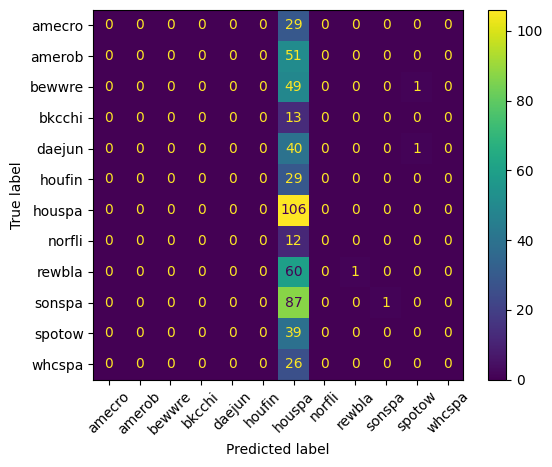

In [303]:
cm = confusion_matrix(y_true, predict_classes)
bird_labels = enc.categories_[0].tolist() 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bird_labels)
disp.plot(xticks_rotation=45)
plt.show()

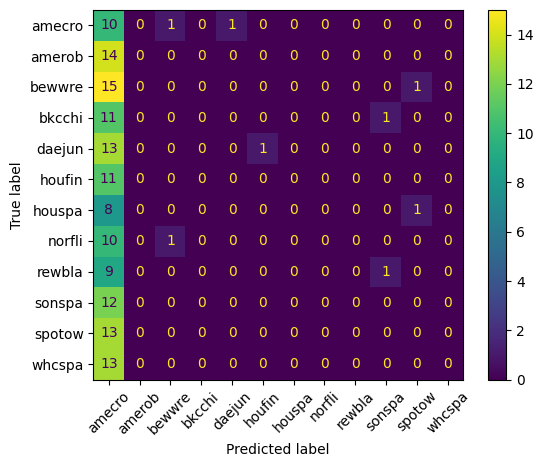

In [ ]:
bird_labels = enc.categories_[0].tolist() 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bird_labels)
disp.plot(xticks_rotation=45)
plt.show()

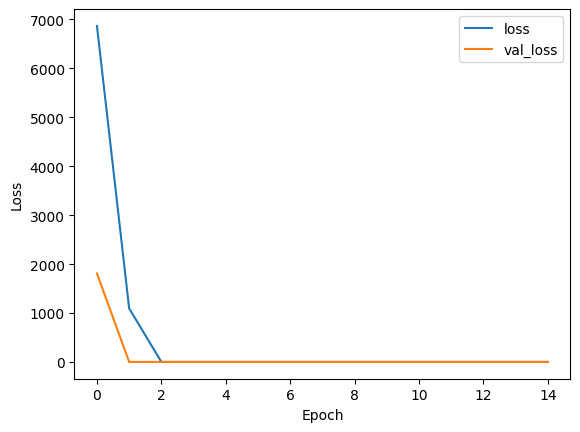

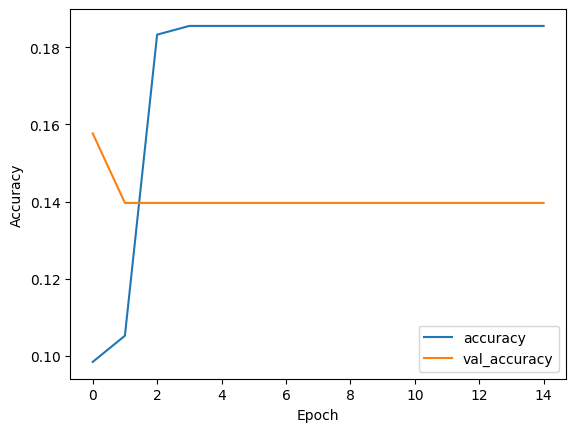

In [304]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

Let's try using a CNN now. Recall we must reshape our matrix.

In [190]:
X_train, X_test, y_train, y_test = train_test_split(x_full
                                                    , names_enc
                                                    , test_size=0.33, random_state=13)

In [191]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [192]:
X_train = X_train.reshape((297, 128, 517, 1))
X_test=X_test.reshape((147,128,517,1))

In [193]:
model_cnn = Sequential(
    [
    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(128,517,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    GlobalAveragePooling2D(),
    Dropout(rate=0.2),
    #Because of our small amount of data, we lower the dropout rate to 0.2
    Dense(units=64, activation='relu'),
    Dense(units=12, activation='softmax')
    ])

model_cnn.summary()

c:\Users\Jesse\anaconda3\envs\myenvname\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 128, 517, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 64, 258, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 64, 258, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 32, 129, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,756 (92.80 KB)

 Trainable params: 23,756 (92.80 KB)

 Non-trainable params: 0 (0.00 B)

In [196]:
#Since we used one hot encoding, we don't need to use sparse categorical crossentropy

model_cnn.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])


history = model_cnn.fit(X_train, y_train,
                        epochs=10,
                        batch_size=16,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 884ms/step - accuracy: 0.0860 - loss: 2.7356 - val_accuracy: 0.0000e+00 - val_loss: 2.5026
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 768ms/step - accuracy: 0.0931 - loss: 2.4881 - val_accuracy: 0.0167 - val_loss: 2.4923
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 794ms/step - accuracy: 0.0960 - loss: 2.5002 - val_accuracy: 0.0667 - val_loss: 2.4979
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 797ms/step - accuracy: 0.0748 - loss: 2.4843 - val_accuracy: 0.0167 - val_loss: 2.5018
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 869ms/step - accuracy: 0.0688 - loss: 2.5017 - val_accuracy: 0.0000e+00 - val_loss: 2.4988
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 780ms/step - accuracy: 0.0980 - loss: 2.4782 - val_accuracy: 0.0167 - val_loss: 2.5065
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.1087 - loss: 2.5137 - val_accuracy: 0.0000e+00 - val_loss: 2.5628
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 811ms/step - accuracy: 0.0898 - loss: 2.4953 -

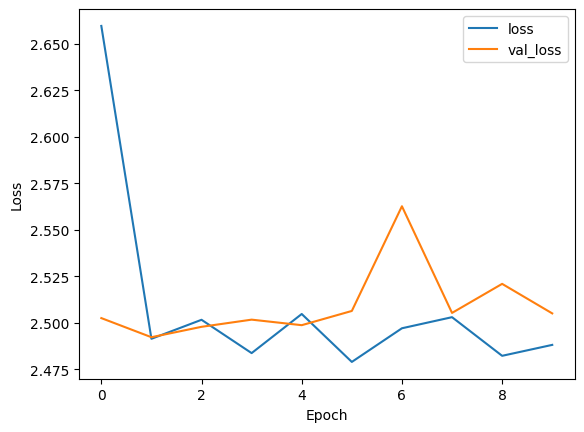

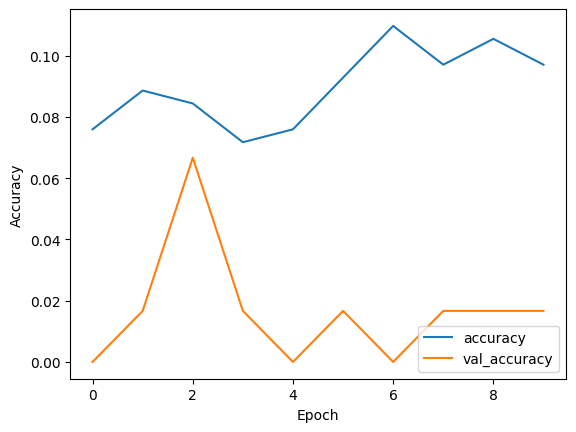

In [197]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [198]:
score = model_cnn.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 13.61%


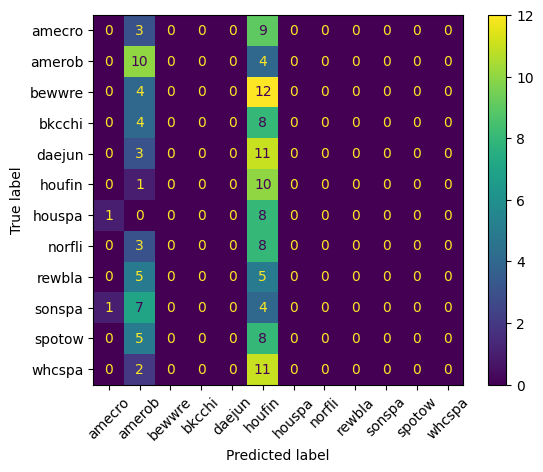

In [ ]:
predict = model_cnn.predict(X_test)

predict_classes = np.argmax(predict, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, predict_classes)
bird_labels = enc.categories_[0].tolist() 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bird_labels)
disp.plot(xticks_rotation=45)
plt.show()

This is a little better than our flattened dense model. Let's try an RNN.

In [201]:
X_train, X_test, y_train, y_test = train_test_split(x_full
                                                    , names_enc
                                                    , test_size=0.33, random_state=13)

X_train=np.array(X_train)
X_test=np.array(X_test)

In [202]:

#We set it so that we place the time coordinate first.


X_train_seq = X_train.transpose(0, 2,1)
X_test_seq=X_test.transpose(0,2,1)

In [203]:
X_train_seq.shape

(297, 517, 128)

In [204]:

model = Sequential([
    SimpleRNN(units=64, input_shape=(517, 128)),
    Dense(64, activation='relu'),
    Dense(12, activation='softmax') 
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\Jesse\anaconda3\envs\myenvname\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [205]:
history = model.fit(X_train_seq, y_train,
                        epochs=40,
                        batch_size=16,
                        validation_split=0.2,
                        verbose=1)

Epoch 1/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 273ms/step - accuracy: 0.1115 - loss: 2.6886 - val_accuracy: 0.0333 - val_loss: 2.5784
Epoch 2/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.0936 - loss: 2.4964 - val_accuracy: 0.0167 - val_loss: 2.6534
Epoch 3/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.1311 - loss: 2.5025 - val_accuracy: 0.1167 - val_loss: 2.5371
Epoch 4/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.1285 - loss: 2.4495 - val_accuracy: 0.0500 - val_loss: 2.6136
Epoch 5/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.1697 - loss: 2.4680 - val_accuracy: 0.0667 - val_loss: 2.6277
Epoch 6/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.1736 - loss: 2.4458 - val_accuracy: 0.0333 - val_loss: 2.5134
Epoch 7/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.1160 - loss: 2.4731 - val_accuracy: 0.0667 - val_loss: 2.4914
Epoch 8/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.0356 - loss: 2.5120 - val_accuracy: 0

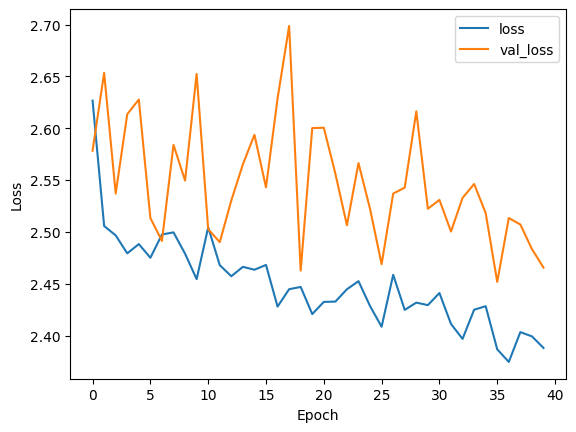

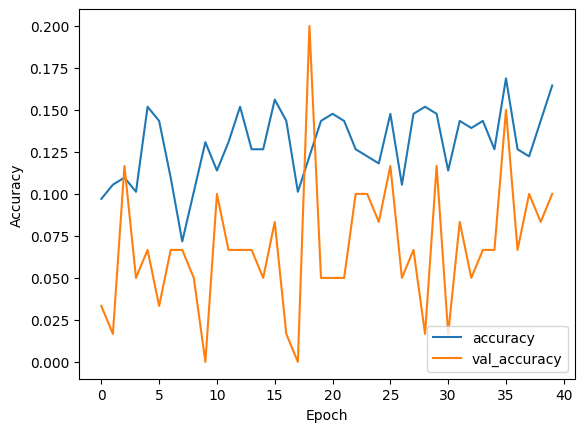

In [206]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show();

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show();

In [207]:
score = model.evaluate(X_test_seq, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(score[1]*100))

Test Accuracy: 13.61%


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step


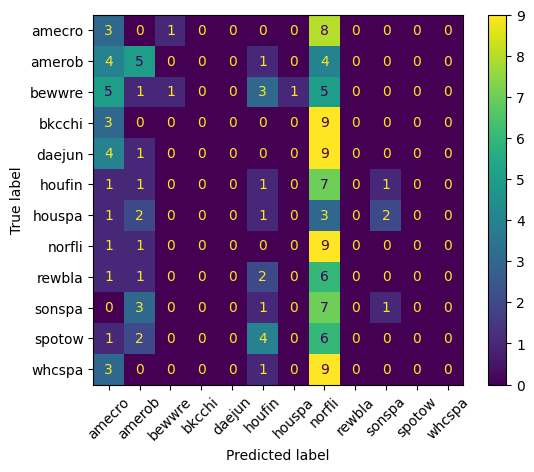

In [209]:
predict = model.predict(X_test_seq)

predict_classes = np.argmax(predict, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, predict_classes)
bird_labels = enc.categories_[0].tolist() 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bird_labels)
disp.plot(xticks_rotation=45)
plt.show()

We can finally proceed with attempting to classify our model. Let's use our best model, the RNN model.

In [211]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import h5py

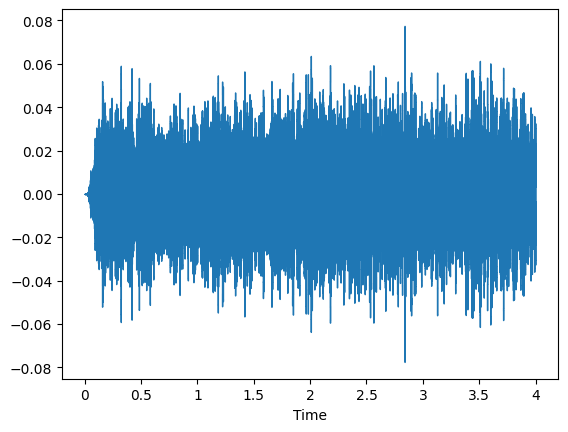

In [ ]:
y, sr = librosa.load("test1.mp3", duration=4)
librosa.display.waveshow(y, sr=sr)

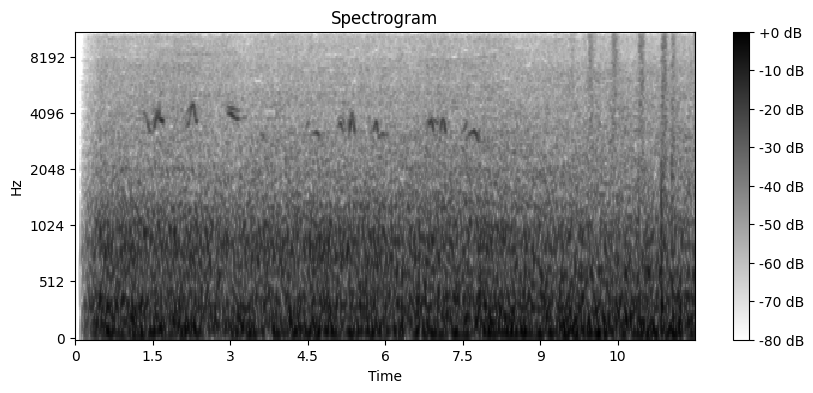

(128, 517)

In [278]:
y, sr = librosa.load("test1.mp3", duration=3)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spec_db, x_axis='time', y_axis='mel', sr=sr, cmap='gray_r')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()
spec_db.shape

In [279]:
spec_test=spec_db.transpose(1,0)

In [280]:
spec_test.shape

(517, 128)

We need our object to have a three dimensional shape.

In [281]:
spec_test=spec_test.reshape(1,517, 128)

In [282]:
results1=model.predict(spec_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


In [283]:
enc.inverse_transform(results1)

array([['norfli']], dtype=object)

In [284]:
top_3_indices = np.argsort(results1[0])[::-1][:3]

top_3_probs = results1[0][top_3_indices]

one_hot_top3 = np.eye(12)[top_3_indices]  

top_3_labels = enc.inverse_transform(one_hot_top3)

for label in top_3_labels:
    print(label)

['norfli']
['amecro']
['houspa']


However, this was only for the first three seconds, let's take the next three seconds. 

In [232]:
y, sr = librosa.load("test1.mp3", offset=3.0, duration=3.0)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
spec_test=spec_db.transpose(1,0)
spec_test=spec_test.reshape(1,517, 128)
results1=model.predict(spec_test)
enc.inverse_transform(results1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


array([['norfli']], dtype=object)

In [238]:
top_3_indices = np.argsort(results1[0])[::-1][:3]

top_3_probs = results1[0][top_3_indices]

one_hot_top3 = np.eye(12)[top_3_indices]  

top_3_labels = enc.inverse_transform(one_hot_top3)

for label in top_3_labels:
    print(label)


['norfli']
['amecro']
['houspa']


In [247]:
y, sr = librosa.load("test1.mp3", offset=6.0, duration=3.0)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
spec_test=spec_db.transpose(1,0)
spec_test=spec_test.reshape(1,517, 128)
results1=model.predict(spec_test)
enc.inverse_transform(results1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


array([['norfli']], dtype=object)

In [248]:
top_3_indices = np.argsort(results1[0])[::-1][:3]

top_3_probs = results1[0][top_3_indices]

one_hot_top3 = np.eye(12)[top_3_indices]  

top_3_labels = enc.inverse_transform(one_hot_top3)

for label in top_3_labels:
    print(label)

['norfli']
['amecro']
['houspa']


In [249]:
y, sr = librosa.load("test1.mp3", offset=9.0, duration=3.0)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
spec_test=spec_db.transpose(1,0)
spec_test=spec_test.reshape(1,517, 128)
results1=model.predict(spec_test)
enc.inverse_transform(results1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


array([['norfli']], dtype=object)

In [250]:
top_3_indices = np.argsort(results1[0])[::-1][:3]

top_3_probs = results1[0][top_3_indices]

one_hot_top3 = np.eye(12)[top_3_indices]  

top_3_labels = enc.inverse_transform(one_hot_top3)

for label in top_3_labels:
    print(label)

['norfli']
['amecro']
['houspa']


In [251]:
y, sr = librosa.load("test1.mp3", offset=12.0, duration=3.0)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
spec_test=spec_db.transpose(1,0)
spec_test=spec_test.reshape(1,517, 128)
results1=model.predict(spec_test)
enc.inverse_transform(results1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


array([['norfli']], dtype=object)

In [252]:
top_3_indices = np.argsort(results1[0])[::-1][:3]

top_3_probs = results1[0][top_3_indices]

one_hot_top3 = np.eye(12)[top_3_indices]  

top_3_labels = enc.inverse_transform(one_hot_top3)

for label in top_3_labels:
    print(label)

['norfli']
['amecro']
['houspa']


In [253]:
y, sr = librosa.load("test1.mp3", offset=15.0, duration=3.0)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
spec_test=spec_db.transpose(1,0)
spec_test=spec_test.reshape(1,517, 128)
results1=model.predict(spec_test)
enc.inverse_transform(results1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


array([['norfli']], dtype=object)

In [254]:
top_3_indices = np.argsort(results1[0])[::-1][:3]

top_3_probs = results1[0][top_3_indices]

one_hot_top3 = np.eye(12)[top_3_indices]  

top_3_labels = enc.inverse_transform(one_hot_top3)

for label in top_3_labels:
    print(label)

['norfli']
['amecro']
['houspa']


In [255]:
y, sr = librosa.load("test1.mp3", offset=18.0, duration=3.0)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
spec_test=spec_db.transpose(1,0)
spec_test=spec_test.reshape(1,517, 128)
results1=model.predict(spec_test)
enc.inverse_transform(results1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


array([['norfli']], dtype=object)

In [256]:
top_3_indices = np.argsort(results1[0])[::-1][:3]

top_3_probs = results1[0][top_3_indices]

one_hot_top3 = np.eye(12)[top_3_indices]  

top_3_labels = enc.inverse_transform(one_hot_top3)

for label in top_3_labels:
    print(label)

['norfli']
['amecro']
['houspa']


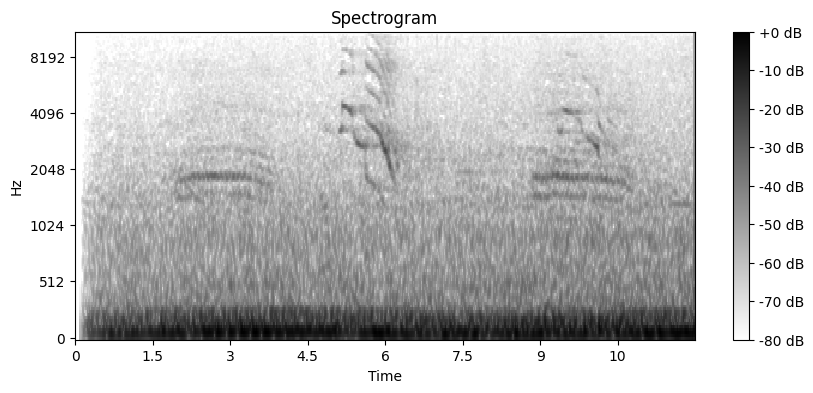

(128, 517)

In [257]:
y, sr = librosa.load("test2.mp3", duration=3)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spec_db, x_axis='time', y_axis='mel', sr=sr, cmap='gray_r')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()
spec_db.shape


In [258]:
spec_test=spec_db.transpose(1,0)
spec_test=spec_test.reshape(1,517, 128)
results2=model.predict(spec_test)
enc.inverse_transform(results2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


array([['norfli']], dtype=object)

In [264]:
top_3_indices = np.argsort(results2[0])[::-1][:3]

top_3_probs = results2[0][top_3_indices]

one_hot_top3 = np.eye(12)[top_3_indices]  

top_3_labels = enc.inverse_transform(one_hot_top3)

for label in top_3_labels:
    print(label)

['norfli']
['amecro']
['houspa']


In [262]:
y, sr = librosa.load("test2.mp3", offset=2.0, duration=3.0)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
spec_test=spec_db.transpose(1,0)
spec_test=spec_test.reshape(1,517, 128)
results2=model.predict(spec_test)
enc.inverse_transform(results2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


array([['norfli']], dtype=object)

In [263]:
top_3_indices = np.argsort(results2[0])[::-1][:3]

top_3_probs = results2[0][top_3_indices]

one_hot_top3 = np.eye(12)[top_3_indices]  

top_3_labels = enc.inverse_transform(one_hot_top3)

for label in top_3_labels:
    print(label)

['norfli']
['amecro']
['houspa']


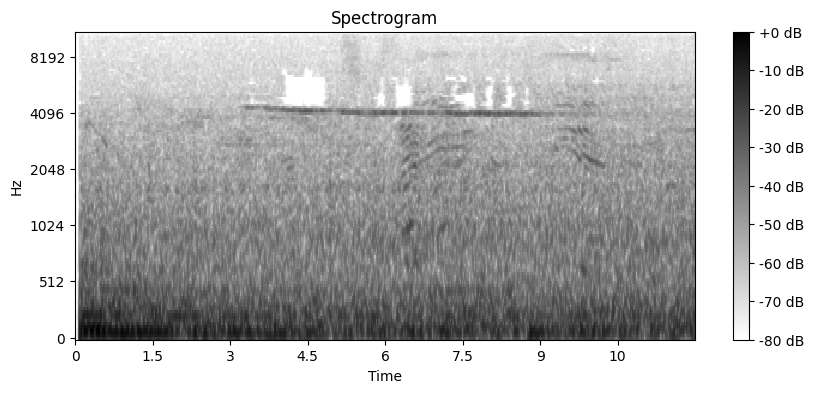

(128, 517)

In [265]:
y, sr = librosa.load("test3.mp3", duration=3)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(spec_db, x_axis='time', y_axis='mel', sr=sr, cmap='gray_r')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()
spec_db.shape


In [266]:
spec_test=spec_db.transpose(1,0)
spec_test=spec_test.reshape(1,517, 128)
results3=model.predict(spec_test)
enc.inverse_transform(results3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


array([['norfli']], dtype=object)

In [267]:
top_3_indices = np.argsort(results3[0])[::-1][:3]

top_3_probs = results3[0][top_3_indices]

one_hot_top3 = np.eye(12)[top_3_indices]  

top_3_labels = enc.inverse_transform(one_hot_top3)

for label in top_3_labels:
    print(label)

['norfli']
['amecro']
['houspa']


In [268]:
y, sr = librosa.load("test3.mp3", offset=3.0, duration=3.0)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
spec_test=spec_db.transpose(1,0)
spec_test=spec_test.reshape(1,517, 128)
results1=model.predict(spec_test)
enc.inverse_transform(results1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


array([['amecro']], dtype=object)

In [270]:
top_3_indices = np.argsort(results1[0])[::-1][:3]

top_3_probs = results1[0][top_3_indices]

one_hot_top3 = np.eye(12)[top_3_indices]  

top_3_labels = enc.inverse_transform(one_hot_top3)

for label in top_3_labels:
    print(label)

['amecro']
['bkcchi']
['houspa']


In [271]:
y, sr = librosa.load("test3.mp3", offset=6.0, duration=3.0)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
spec_test=spec_db.transpose(1,0)
spec_test=spec_test.reshape(1,517, 128)
results1=model.predict(spec_test)
enc.inverse_transform(results1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


array([['amecro']], dtype=object)

In [272]:
top_3_indices = np.argsort(results1[0])[::-1][:3]

top_3_probs = results1[0][top_3_indices]

one_hot_top3 = np.eye(12)[top_3_indices]  

top_3_labels = enc.inverse_transform(one_hot_top3)

for label in top_3_labels:
    print(label)

['amecro']
['bkcchi']
['houspa']


In [274]:
y, sr = librosa.load("test3.mp3", offset=9.0, duration=3.0)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
spec_test=spec_db.transpose(1,0)
spec_test=spec_test.reshape(1,517, 128)
results1=model.predict(spec_test)
enc.inverse_transform(results1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


array([['norfli']], dtype=object)

In [275]:
top_3_indices = np.argsort(results1[0])[::-1][:3]

top_3_probs = results1[0][top_3_indices]

one_hot_top3 = np.eye(12)[top_3_indices]  

top_3_labels = enc.inverse_transform(one_hot_top3)

for label in top_3_labels:
    print(label)

['norfli']
['amecro']
['houspa']


In [276]:
y, sr = librosa.load("test3.mp3", offset=12.0, duration=3.0)
spec = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=128, win_length=512)
spec_db = librosa.power_to_db(spec, ref=np.max)
spec_test=spec_db.transpose(1,0)
spec_test=spec_test.reshape(1,517, 128)
results1=model.predict(spec_test)
enc.inverse_transform(results1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


array([['norfli']], dtype=object)

In [277]:
top_3_indices = np.argsort(results1[0])[::-1][:3]

top_3_probs = results1[0][top_3_indices]

one_hot_top3 = np.eye(12)[top_3_indices]  

top_3_labels = enc.inverse_transform(one_hot_top3)

for label in top_3_labels:
    print(label)

['norfli']
['amecro']
['houspa']


Find the below the appendix that I use to generate visuals for my report.

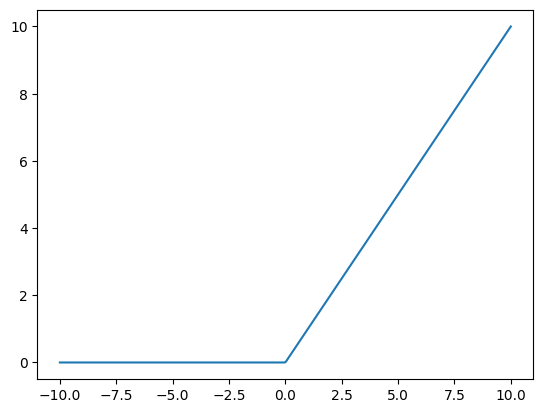

In [ ]:
def relu(x):
    return np.max([0,x])
x = np.linspace(-10, 10, 400)
y = [relu(k) for k in x]

plt.plot(x, y)

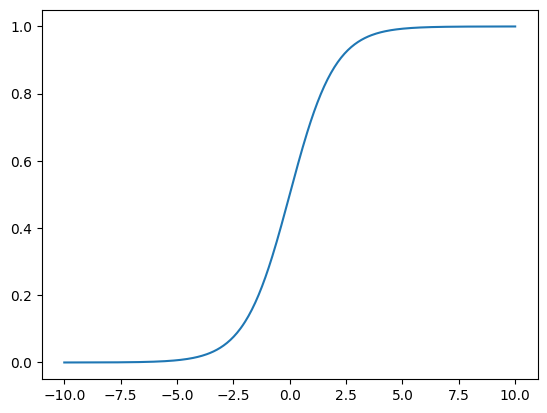

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.linspace(-10, 10, 400)
y = sigmoid(x)

plt.plot(x, y, label='sigmoid(x)')

In [ ]:
!jupyter nbconvert JL_Practical_Homework_3_NN.ipynb --to html --template classic

[NbConvertApp] Converting notebook JL_Practical_Homework_3_NN.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 25 image(s).
[NbConvertApp] Writing 1696757 bytes to JL_Practical_Homework_3_NN.html
